In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [2]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
dtypes = {
"duration": np.int8,
"protocol_type": np.object,
"service": np.object,
"flag": np.object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": np.object
}

columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

df = pd.read_csv("/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected", sep=",", names=columns, dtype=dtypes, index_col=None)

In [4]:
df.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [5]:
#Feature Selection
new_features=['dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate','label']

In [6]:
# 0 for normal data and 1 for abnormalities
df.label=df.label.apply(lambda x: 0 if x == 'normal.' else 1)

In [7]:
df=df[new_features]

In [8]:
#label encoding 
for column in df.columns:
    if df[column].dtype == np.object:
        encoded = LabelEncoder()
        
        encoded.fit(df[column])
        df[column] = encoded.transform(df[column])

In [9]:
#randomly sample 500 data point for training
df_train=df[df.label==0].sample(500)

In [10]:
#remove the item sampled from our dataset
index_list=df_train.index
df=df.drop(index_list)

In [11]:
#drop the label columns
df_train=df_train.drop('label',axis=1)

In [12]:
df_train.shape

(500, 8)

In [13]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8))
    assert model.output_shape == (None,8 )
   
    
    return model

In [14]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[1,8]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

   
    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

In [15]:
generator=make_generator_model()
discriminator=make_discriminator_model()

In [16]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [17]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [18]:
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy())  # Loss: 11.522857

Loss:  -0.0


In [19]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [20]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [21]:
EPOCHS = 1000
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 64



In [22]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,8))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [23]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [24]:
x_train=df_train.values
train(x_train,EPOCHS) 

Time for epoch 1 is 3.4030797481536865 sec 
Time for epoch 2 is 1.205353021621704 sec 
Time for epoch 3 is 1.476698398590088 sec 
Time for epoch 4 is 1.0895369052886963 sec 
Time for epoch 5 is 1.0888020992279053 sec 
Time for epoch 6 is 1.0873100757598877 sec 
Time for epoch 7 is 1.0893151760101318 sec 
Time for epoch 8 is 1.0793685913085938 sec 
Time for epoch 9 is 1.087341070175171 sec 
Time for epoch 10 is 1.0817441940307617 sec 
Time for epoch 11 is 1.0746045112609863 sec 
Time for epoch 12 is 1.1271674633026123 sec 
Time for epoch 13 is 1.0881383419036865 sec 
Time for epoch 14 is 1.0854783058166504 sec 
Time for epoch 15 is 1.0921008586883545 sec 
Time for epoch 16 is 1.0937557220458984 sec 
Time for epoch 17 is 1.0887837409973145 sec 
Time for epoch 18 is 1.0782623291015625 sec 
Time for epoch 19 is 1.0797979831695557 sec 
Time for epoch 20 is 1.0770647525787354 sec 
Time for epoch 21 is 1.0817673206329346 sec 
Time for epoch 22 is 1.1318621635437012 sec 
Time for epoch 23 is 1

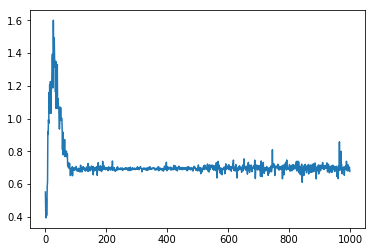

In [25]:
plt.plot(history['gen'])

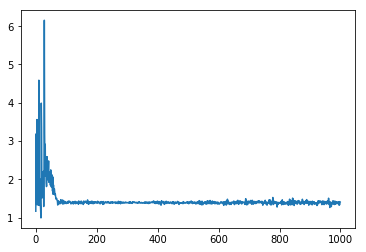

In [26]:
plt.plot(history['dis'])

In [27]:
y_test=df.label
x_test=df.drop('label',axis=1).values.reshape(-1,1,8)

In [28]:
y_pred=discriminator.predict(x_test)

In [29]:
discriminator.save_weights('discriminator_weights.h5')

In [30]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score



Text(0, 0.5, 'y_pred')

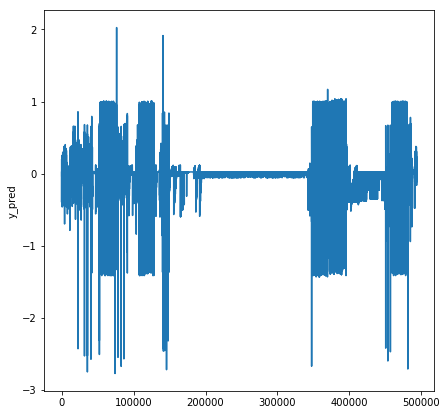

In [31]:
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [32]:
#looking for the optimal probability threshold
#prob=[0.5,0.55,0.6,0.65,0.75,0.8,0.85,0.9,0.95,1,2,2.5,5]
prob=[-0.2,-0.1,-0.05,0,0.005,0.1]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.21519958831305952 : accuracy=0.2830902838987601 : precision=0.8152739109489279 : recall=0.12226806774158586
439436 54085
prob =-0.1 and f1 score =0.26018548237959904 : accuracy=0.2947716510543624 : precision=0.8079831876937831 : recall=0.1542610707687344
419815 73706
prob =-0.05 and f1 score =0.2723184415982567 : accuracy=0.28819847585006514 : precision=0.797332225097256 : recall=0.16567652107283556
407513 86008
prob =0 and f1 score =0.30354531456735867 : accuracy=0.27046265508458606 : precision=0.7739887328171605 : recall=0.19776278346435855
373300 120221
prob =0.005 and f1 score =0.3022621738864789 : accuracy=0.25953302898964786 : precision=0.7678619735493305 : recall=0.1995095061538578
366520 127001
prob =0.1 and f1 score =0.8290630527831025 : accuracy=0.7098157930462938 : precision=0.7894646888378934 : recall=0.8753702018687161
52458 441063


The best threshold value is prob = 0;

While GAN is widely used in computer vision problem, it does perform very well in tabular data. One of the most common problem in anomaly detection is class imbalance. While using GAN, we indirectly overcome the problem as we only training our model with just one of the classes. Besides, we only training our model with just 500 data which is a very small amount when comparing to the data required by other ML/DL models.

If you find out any mistakes in my notebook, pls let me know.

Reference : https://www.tensorflow.org/tutorials/generative/dcgan